# ASSIGNMENT: (to be deleted when done)

As mentioned earlier during class, now that you all have submitted your “semi-individual” assignments, it is time to get together in groups and figure out how to “trim down” the various exercises into something that you would like to submit as your portfolio for the oral exam.
 

During the exam, we will use the submission for additional questions. This means you have the opportunity to actively use your submission to influence the agenda for the exam.
 

We do not want you to simply take the 4 weekly assignments and concatenate them into a long notebook or multiple files in a folder/repository. What we want is for you to think about how you can make something creative and useful from the various things you have worked on, while you have been improving and learning. For instance, if you decide to submit a notebook with a regression supported by some good visualizations, that would be just fine. It’s not the quantity we are after.
The submission should hovewer have multiple notebooks for the different parts (please do not do superlong messy notebooks with endless outputs) and at least one Streamlit app (deployed! - and working) demonstrating the functionality. 
 

Also, the submissions are not graded directly.
 
 
Feel free to ask here if you have further questions.

### Funding Duration Prediction:
### Target: funding_duration_days (Time to Secure Loan)

### Problem Statement:

The objective is to predict how long it will take for a loan request to be fully funded, based on factors such as the borrower's country, sector, activity type, loan amount, and number of lenders. By understanding these relationships, the model can provide insights into which factors lead to faster or slower funding times.
Type of Model:
The model will use regression, as the target variable (funding_duration_days) represents a continuous numerical value. The goal is to predict the number of days required to secure full funding for a loan based on the given features.
### Objective:
This model aims to assist lending platforms and financial institutions in forecasting how long a loan will take to be fully funded after a request is made. This can help in optimizing loan approval strategies, better managing borrower expectations, and allocating resources efficiently to improve funding success rates.

# **M1 Exam Submission**

 * Business Problem: 

 * Objectives:

## **Table of Contents**

#### I. Import Libraries and Data
#### II. Data Preparation
#### III. Model Development
#### IV. Model Evaluation

# I. Import Libraries and Data


In [3]:
# install all requried libraries
!pip install -r requirements.txt

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import geopandas as gpd
import altair as alt
from vega_datasets import data

# library used for gender mapping - section 4
import re

In [4]:
!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_0.csv.zip"
!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_1.csv.zip"
!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_2.csv.zip"

# Unzip to csv
!unzip -o kiva_loans_part_0.csv.zip
!unzip -o kiva_loans_part_1.csv.zip
!unzip -o kiva_loans_part_2.csv.zip

# Loading datasets
data_part1 = pd.read_csv("kiva_loans_part_0.csv")
data_part2 = pd.read_csv("kiva_loans_part_1.csv")
data_part3 = pd.read_csv("kiva_loans_part_2.csv")

File ‘kiva_loans_part_0.csv.zip’ already there; not retrieving.

File ‘kiva_loans_part_1.csv.zip’ already there; not retrieving.

File ‘kiva_loans_part_2.csv.zip’ already there; not retrieving.

Archive:  kiva_loans_part_0.csv.zip
  inflating: kiva_loans_part_0.csv   
  inflating: __MACOSX/._kiva_loans_part_0.csv  
Archive:  kiva_loans_part_1.csv.zip
  inflating: kiva_loans_part_1.csv   
  inflating: __MACOSX/._kiva_loans_part_1.csv  
Archive:  kiva_loans_part_2.csv.zip
  inflating: kiva_loans_part_2.csv   
  inflating: __MACOSX/._kiva_loans_part_2.csv  


## Data Cleaning, Manipulation & Feature Selection

In [5]:
# We can see, that the imported loan dataset consists of 3 parts. We will like to combine these to one big dataset
data = pd.concat([data_part1, data_part2, data_part3])

In [7]:
# Show the first rows
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [16]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   country             671205 non-null  object 
 6   region              614405 non-null  object 
 7   partner_id          657698 non-null  float64
 8   posted_time         671205 non-null  object 
 9   disbursed_time      668809 non-null  object 
 10  funded_time         622874 non-null  object 
 11  term_in_months      671205 non-null  float64
 12  lender_count        671205 non-null  int64  
 13  borrower_genders    666984 non-null  object 
 14  repayment_interval  671205 non-null  object 
 15  date                671205 non-null  ob

In [18]:
#Check to find columns with missing data
data.isna().sum()


id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country                   0
region                56800
partner_id            13507
posted_time               0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
date                      0
dtype: int64

In [17]:
data = data.drop(['tags', 'use', 'currency', 'country_code'], axis=1)

KeyError: "['tags', 'use', 'currency', 'country_code'] not found in axis"

In [19]:
# Loans never funded
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   country             671205 non-null  object 
 6   region              614405 non-null  object 
 7   partner_id          657698 non-null  float64
 8   posted_time         671205 non-null  object 
 9   disbursed_time      668809 non-null  object 
 10  funded_time         622874 non-null  object 
 11  term_in_months      671205 non-null  float64
 12  lender_count        671205 non-null  int64  
 13  borrower_genders    666984 non-null  object 
 14  repayment_interval  671205 non-null  object 
 15  date                671205 non-null  ob

Text(0.5, 1.0, 'Box Plot of Passenger loan_amount')

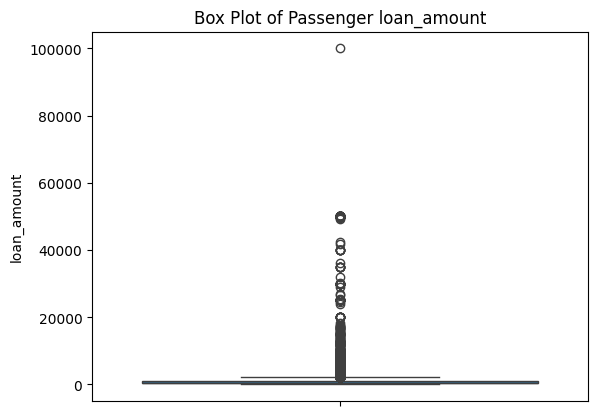

In [21]:
sns.boxplot(data=data, y='loan_amount').set_title('Box Plot of Passenger loan_amount')

In [22]:
# Calculate Z-scores
z_scores = zscore(data['loan_amount'])

# Get boolean array indicating the presence of outliers
# Using 2 & -2 z_scores to get 95% of data within 2 standard deviations
data['outlier_loan_amount'] = (z_scores > 2) | (z_scores < -2)


#Removing outliers
data_clean = data[~data['outlier_loan_amount']]

# Check amount of outliers (if any?)
data['outlier_loan_amount'].sum()

np.int64(26177)

Text(0.5, 1.0, 'Box Plot of Passenger loan_amount')

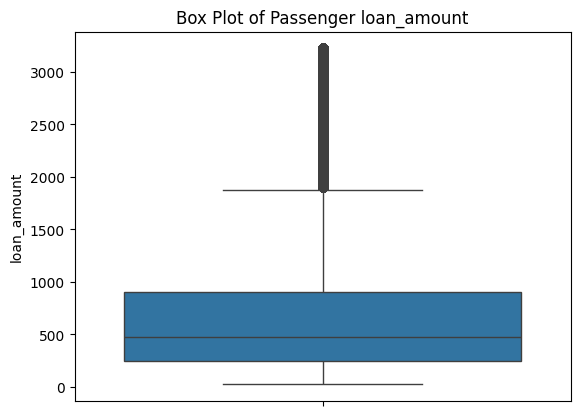

In [23]:
sns.boxplot(data=data_clean, y='loan_amount').set_title('Box Plot of Passenger loan_amount')

## Descriptive Statistics

## Exploratory Data Analysis (EDA)